# Ill-Gaussian Target Practice

In [1]:
] activate "../"

  Activating project at `~/PhD/MicroCanonicalHMC.jl`


In [2]:
using Distributions
using ForwardDiff
using LinearAlgebra
using Random

using PyPlot
using Distributed

using Revise
using MicroCanonicalHMC

## MCHMC

In [3]:
d = 500
k = 10
m = 10*randn(d)
println(m)
e = 10 .^ LinRange(log(1/sqrt(k)), log(sqrt(k)), d)
println(e)
cov_matt = Diagonal(e);
k = 100
m = Vector(LinRange(1, 100, d))
e = 10 .^ LinRange(log(1/sqrt(k)), log(sqrt(k)), d)
cov_matt = Diagonal(e);

[16.571927905015873, -6.129694756763321, -9.14077542402771, -8.189234369177594, 7.054132076096017, -8.068608210817413, 0.058287673355319175, 0.8325126400303011, 4.148181813617234, 2.7887725607412057, -3.975988183498803, 3.5295013676185114, -10.083156763096362, 15.128651360031284, -0.30757335788393286, -13.93530054391043, 15.522254785962648, -12.620125540299924, 13.00396924437404, 22.57871174733973, -4.7217217370135165, 0.20273504789828967, 16.3007570858569, -0.32981219961214475, 3.8941960625181093, 9.825805480959612, 10.74555155848962, 0.9418412531989455, -0.7142188922118892, -9.7023127338326, -3.920922233069366, 1.4279815008812773, 1.605720203080656, -0.47958768184459405, -9.002074553065855, -16.17852792291272, -4.218145989447788, 0.8957771181155398, 8.0631831473274, -5.724550057432159, -6.030966920766914, 10.651513655812174, -9.751162751933206, 5.795749851027056, 4.822213579312115, 18.84094981887628, 9.568102338668762, -8.705669855396813, 0.6640137023364896, -11.121498442724995, 4.63

[0.07058419296443591, 0.07133815161351878, 0.07210016381709662, 0.07287031560076272, 0.07364869390900904, 0.07443538661504215, 0.0752304825307029, 0.07603407141649325, 0.0768462439917089, 0.07766709194468153, 0.07849670794312905, 0.07933518564461775, 0.08018261970713494, 0.0810391057997758, 0.081904740613543, 0.08277962187226313, 0.08366384834361837, 0.08455751985029705, 0.08546073728126276, 0.08637360260314396, 0.08729621887174535, 0.08822869024368185, 0.08917112198813765, 0.09012362049874964, 0.0910862933056192, 0.09205924908745079, 0.0930425976838218, 0.09403645010758181, 0.09504091855738594, 0.09605611643036042, 0.0970821583349051, 0.09811916010363131, 0.09916723880643881, 0.1002265127637319, 0.10129710155977727, 0.10237912605620378, 0.10347270840564725, 0.1045779720655402, 0.10569504181204971, 0.10682404375416325, 0.10796510534792601, 0.10911835541082922, 0.11028392413635314, 0.11146194310866459, 0.1126525453174722, 0.11385586517303964, 0.11507203852135958, 0.11630120265949022, 0.

In [4]:
alpha_eps = 0.065
alpha_L = 2.27184

2.27184

In [5]:
ill_gaussian_target = GaussianTarget(m, cov_matt)
ill_gaussian_spl = MCHMC(alpha_eps*sqrt(d), alpha_L*sqrt(d); init_eps=0.035, varE_wanted=0.001, sigma=ones(d));

In [6]:
ill_gaussian_samples = Sample(ill_gaussian_spl, ill_gaussian_target, 300_000;
                              burn_in=10_000, dialog=true);

[ Info: Using given sigma ✅
[ Info: Using given eps ✅
[ Info: Using given L ✅
[ Info: Starting burn in
[ Info: Burn in finished


In [7]:
ill_gaussian_d1 = [sample[1] for sample in ill_gaussian_samples]
ill_gaussian_d50 = [sample[Int(d/2)] for sample in ill_gaussian_samples]
E = [sample[end-1] for sample in ill_gaussian_samples];

In [8]:
VarE = std(E)^2/d

0.001894688172583035

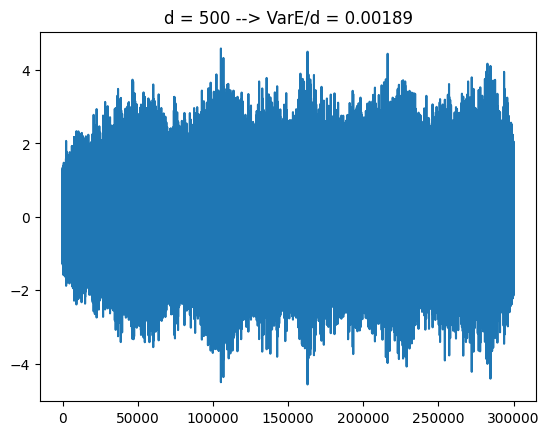

PyObject Text(0.5, 1.0, 'd = 500 --> VarE/d = 0.00189')

In [9]:
plt.plot(E, label="E/d")
plt.title(string("d = ", d, " --> VarE/d = ", round(VarE, digits=5)))

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


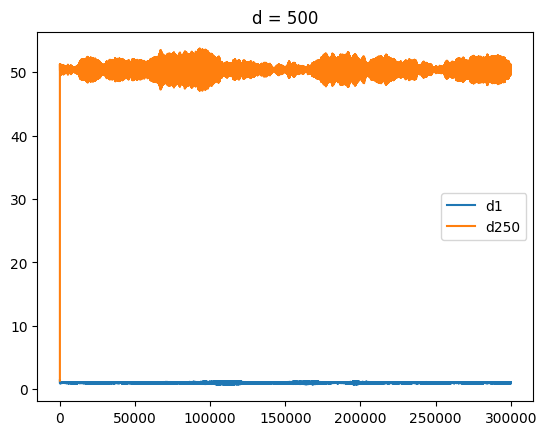

In [10]:
plt.plot(ill_gaussian_d1, label="d1")
plt.plot(ill_gaussian_d50, label=string("d", Int(d/2)))
plt.title(string("d = ", d))
plt.legend()
plt.show()

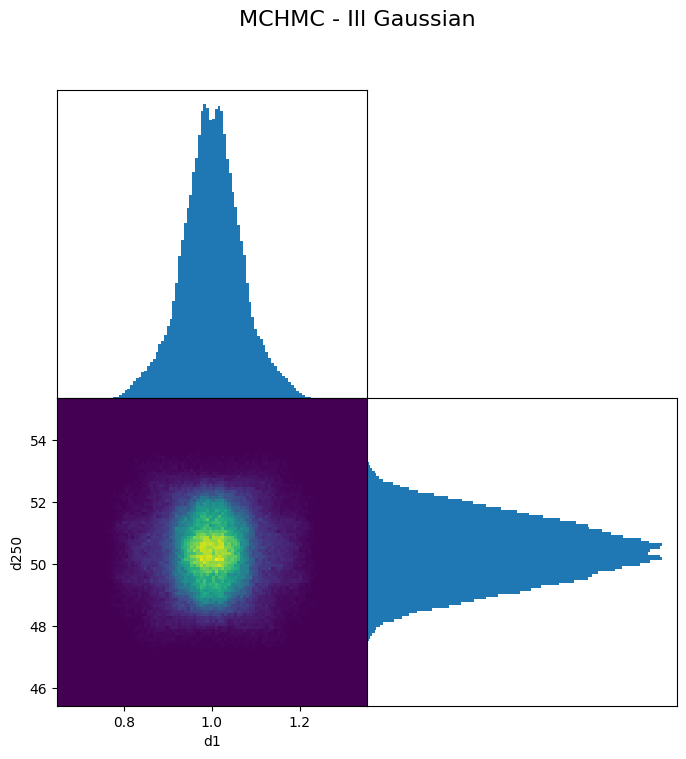

In [11]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("MCHMC - Ill Gaussian", fontsize=16)

fig.delaxes(axis[1,2])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(ill_gaussian_d1, bins=100, range=[m[1]-5*sqrt(e[1]),m[1]+5sqrt(e[1])])
axis[1,1].set_yticks([])

axis[2,2].hist(ill_gaussian_d50, bins=100, orientation="horizontal", range=[m[Int(d/2)]-5*sqrt(e[Int(d/2)]),m[Int(d/2)]+5*sqrt(e[Int(d/2)])])
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[2,1].hist2d(ill_gaussian_d1, ill_gaussian_d50, bins=100, range=[[m[1]-5*sqrt(e[1]),m[1]+5sqrt(e[1])],
                                                                     [m[Int(d/2)]-5*sqrt(e[Int(d/2)]),m[Int(d/2)]+5*sqrt(e[Int(d/2)])]])
axis[2,1].set_xlabel("d1")
axis[2,1].set_ylabel(string("d", Int(d/2)));

## NUTS

In [12]:
using AdvancedHMC
using LogDensityProblems

In [13]:
# Define the target distribution using the `LogDensityProblem` interface
struct LogTargetDensity
    dim::Int
end
LogDensityProblems.logdensity(p::LogTargetDensity, θ) = -ill_gaussian_target.nlogp(θ) #-sum(abs2, θ) / 2  # standard multivariate normal
LogDensityProblems.dimension(p::LogTargetDensity) = p.dim
LogDensityProblems.capabilities(::Type{LogTargetDensity}) = LogDensityProblems.LogDensityOrder{0}()

In [14]:
# Choose parameter dimensionality and initial parameter value
initial_θ = ill_gaussian_target.prior_draw(0.0)
ℓπ = LogTargetDensity(d)

# Set the number of samples to draw and warmup iterations
n_samples, n_adapts = 100_000, 1_000

# Define a Hamiltonian system
metric = DiagEuclideanMetric(d)
hamiltonian = Hamiltonian(metric, ℓπ, ForwardDiff)

# Define a leapfrog solver, with initial step size chosen heuristically
initial_ϵ = find_good_stepsize(hamiltonian, initial_θ)
integrator = AdvancedHMC.Leapfrog(initial_ϵ)

# Define an HMC sampler, with the following components
#   - multinomial sampling scheme,
#   - generalised No-U-Turn criteria, and
#   - windowed adaption for step-size and diagonal mass matrix
proposal = NUTS{MultinomialTS, GeneralisedNoUTurn}(integrator)
adaptor = StanHMCAdaptor(MassMatrixAdaptor(metric), StepSizeAdaptor(0.8, integrator))

# Run the sampler to draw samples from the specified Gaussian, where
#   - `samples` will store the samples
#   - `stats` will store diagnostic statistics for each sample
ill_gaussian_samples_hmc, stats = sample(hamiltonian, proposal, initial_θ, n_samples, adaptor, n_adapts; progress=true)

LoadError: UndefVarError: `ill_gaussian_target` not defined

In [15]:
ill_gaussian_d1_hmc = [sample[1] for sample in ill_gaussian_samples_hmc]
ill_gaussian_d50_hmc = [sample[50] for sample in ill_gaussian_samples_hmc];

LoadError: UndefVarError: `ill_gaussian_samples_hmc` not defined

In [16]:
fig, axis = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle("MCHMC - Gaussian", fontsize=16)

fig.delaxes(axis[1,2])
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

axis[1,1].hist(ill_gaussian_d1_hmc, bins=100, range=[-8,8])
axis[1,1].set_yticks([])

axis[2,2].hist(ill_gaussian_d50_hmc, bins=100, orientation="horizontal", range=[42, 58])
axis[2,2].set_xticks([])
axis[2,2].set_yticks([])

axis[2,1].hist2d(ill_gaussian_d1_hmc, ill_gaussian_d50_hmc, bins=100, range=[[-8,8],[42, 58]])
axis[2,1].set_xlabel("d1")
axis[2,1].set_ylabel("d2");

LoadError: UndefVarError: `ill_gaussian_d1_hmc` not defined